# Dataviz and -analysis of GK stats across Top 5 Leagues

## 1. Data preparation

In [1]:
from adjustText import adjust_text
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
%matplotlib inline

In [2]:
#import Premier League
df_epl_stats = pd.read_csv("c:/Users/Christian/OneDrive/football_analysis/data/epl_gk_stats_MD22.csv", index_col="Rk")
df_epl_adv_stats = pd.read_csv("c:/Users/Christian/OneDrive/football_analysis/data/epl_gk_adv_stats_MD22.csv", index_col="Rk")

#import La Liga
df_laLiga_stats = pd.read_csv("c:/Users/Christian/OneDrive/football_analysis/data/laLiga_gk_stats_MD19.csv", index_col="Rk")
df_laLiga_adv_stats = pd.read_csv("c:/Users/Christian/OneDrive/football_analysis/data/laLiga_gk_adv_stats_MD19.csv", index_col="Rk")

#import Bundesliga
df_bundes_stats = pd.read_csv("c:/Users/Christian/OneDrive/football_analysis/data/bundes_gk_stats_MD17.csv",index_col="Rk")
df_bundes_adv_stats = pd.read_csv("c:/Users/Christian/OneDrive/football_analysis/data/bundes_gk_adv_stats_MD17.csv",index_col="Rk")

#import Ligue 1
df_ligue1_stats = pd.read_csv("c:/Users/Christian/OneDrive/football_analysis/data/ligue1_gk_stats_MD19.csv", index_col="Rk")
df_ligue1_adv_stats = pd.read_csv("c:/Users/Christian/OneDrive/football_analysis/data/ligue1_gk_adv_stats_MD19.csv", index_col="Rk")

#import Serie A
df_serieA_stats = pd.read_csv("c:/Users/Christian/OneDrive/football_analysis/data/serieA_gk_stats_MD19.csv", index_col="Rk")
df_serieA_adv_stats = pd.read_csv("c:/Users/Christian/OneDrive/football_analysis/data/serieA_gk_adv_stats_MD19.csv", index_col="Rk")

**Concatenate our datasets**

In [3]:
df_top5_stats = pd.concat([df_epl_stats, df_ligue1_stats, df_bundes_stats, df_serieA_stats, df_laLiga_stats], ignore_index=True, sort=False)

df_top5_adv_stats = pd.concat([df_epl_adv_stats, df_ligue1_adv_stats, df_bundes_adv_stats, df_serieA_adv_stats, df_laLiga_adv_stats], ignore_index=True, sort=False)

Remove keepers with less than 10 games played

In [4]:
df_top5_stats = df_top5_stats.drop(df_top5_stats[df_top5_stats["MP"] < 10].index)

df_top5_stats = df_top5_stats.drop(df_top5_stats[df_top5_stats["MP"] <= 10].index)

Clean player names

In [14]:
df_top5_stats["Player"] = [name.split("\\")[0] for name in df_top5_stats["Player"]]
df_top5_adv_stats["Player"] = [name.split("\\")[0] for name in df_top5_adv_stats["Player"]]

Fill NaN values

In [6]:
df_top5_stats.fillna(df_top5_stats.mean(), inplace=True)

df_top5_adv_stats["Player"] = [name.split("\\")[0] for name in df_top5_adv_stats["Player"]]

# 2. Data visualization

### 2.1. Calculate metrics

In [7]:
#saves per match
df_top5_stats["Sv/90"] = df_top5_stats["Saves"] / (df_top5_stats["Min"]/90)

#saves per goal
df_top5_stats["Sv/GA"] = df_top5_stats["Saves"] / df_top5_stats["GA"]

#GSAA
#first we calculate how many saves an average GK would have saved if he faced the same amount of shots as our GK
df_top5_stats["SvavgSv%"] = (df_top5_stats["Save%"].mean()*df_top5_stats["SoTA"])
#with SvavgSv% we can then calculate how many goals our team/GK would have let in if our GK performed as an average GK
df_top5_stats["GAavgSv%"] = df_top5_stats["SoTA"] - df_top5_stats["SvavgSv%"]
#with GAavgSv% we can calculate how many more or less goals our GK have saved, that an average GK wouldn¨t had saved
df_top5_stats["GSAA"] = df_top5_stats["GAavgSv%"] - df_top5_stats["GA"]

#xSv%
df_top5_adv_stats["xSv%"] = ((df_top5_stats["SoTA"] - df_top5_adv_stats["oTxG"])/df_top5_stats["SoTA"])*100

#aSv%
df_top5_adv_stats["aSv%"] = ((df_top5_stats["Save%"]*100) - df_top5_adv_stats["xSv%"])

### 2.2. Saves per Match & Saves per Goal Against

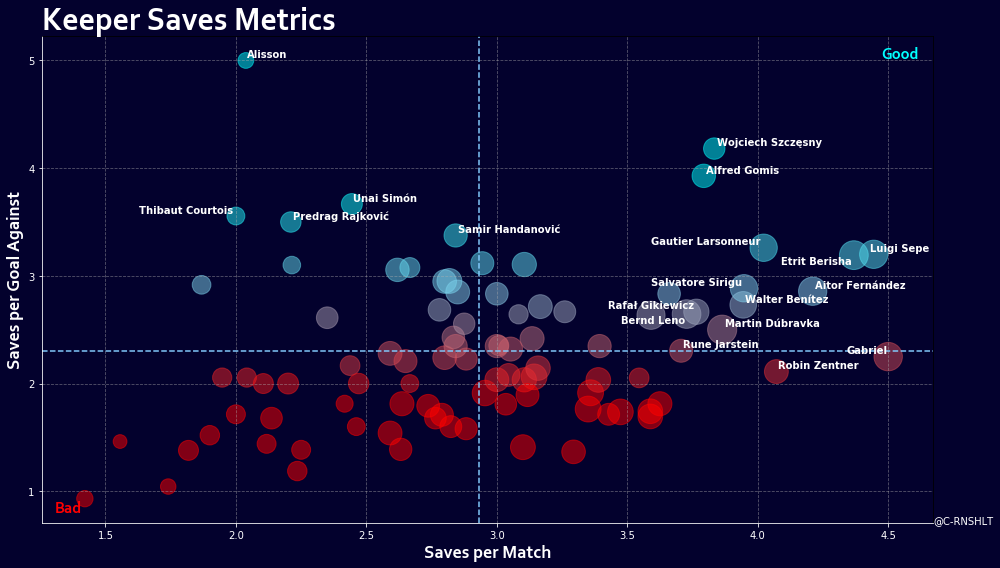

In [8]:
x = df_top5_stats["Sv/90"]
y = df_top5_stats["Sv/GA"]
z = df_top5_stats["Saves"]*10
names = df_top5_stats["Player"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 3.8 #highest value on y or x axis

#plot save% vs CS%
fig, ax = plt.subplots(figsize=(14,8))
plt.scatter(x, y, s=z,
            color=rvb(y/N), alpha=0.5)

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#add mean lines and grid
ax.axvline(x.mean(), linestyle='--', color="#82cafc")
ax.axhline(y.mean(), linestyle='--', color="#82cafc")
ax.grid(linestyle="--", alpha=0.5)

#adding text
ax.set_xlabel("Saves per Match", 
              color="white", fontsize=18, fontname="Corbel", fontweight="bold")
ax.set_ylabel("Saves per Goal Against", 
              color="white", fontsize=18, fontname="Corbel", fontweight="bold")
ax.set_title("Keeper Saves Metrics", 
             color="white", fontsize=32, loc="left", fontname="Corbel", fontweight="bold")

#get values for plotting text
ymin, ymax = ax.get_ylim()
xmin, xmax = ax.get_xlim()

#shading
saves_match = np.linspace(x.min(), x.max(), 1000)
saves_GA = np.linspace(y.min(), y.max(), 1000)

#add text/grid inside plot
#bottom left
ax.text(xmin+0.05, ymin+0.1, 
        "Bad", fontsize=16, fontname="Corbel", fontweight="bold", color="red")
#top right
ax.text(xmax-0.2, ymax-0.2, 
        "Good", fontsize=16, fontname="Corbel", fontweight="bold", color="cyan")

#change colour of axis and ticks
ax.tick_params(axis="both", colors="white")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")

#Create labels for each GK
text = [ax.annotate(txt, xy = (x.iloc[i], y.iloc[i]), color="white", fontweight="semibold") 
        for i, txt in enumerate(names) if x.iloc[i] > 3.7 or y.iloc[i] > 3.3]

adjust_text(text)

#add signature
ax.text(xmax, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()
#plt.savefig("output/EPL_MD22_Sv90_GA_bubble.png", dpi=300, facecolor="#03012d")

### 2.3. GSAE (Goals Saved Above Expectation)

In [9]:
top5_GSAE = [df_epl_adv_stats.sort_values("oTxG+/-")["oTxG+/-"], df_bundes_adv_stats.sort_values("oTxG+/-")["oTxG+/-"], 
             df_laLiga_adv_stats.sort_values("oTxG+/-")["oTxG+/-"], df_ligue1_adv_stats.sort_values("oTxG+/-")["oTxG+/-"], 
             df_serieA_adv_stats.sort_values("oTxG+/-")["oTxG+/-"]]
top5_names = [df_epl_adv_stats.sort_values("oTxG+/-")["Player"], df_bundes_adv_stats.sort_values("oTxG+/-")["Player"], 
              df_laLiga_adv_stats.sort_values("oTxG+/-")["Player"], df_ligue1_adv_stats.sort_values("oTxG+/-")["Player"], 
              df_serieA_adv_stats.sort_values("oTxG+/-")["Player"]]

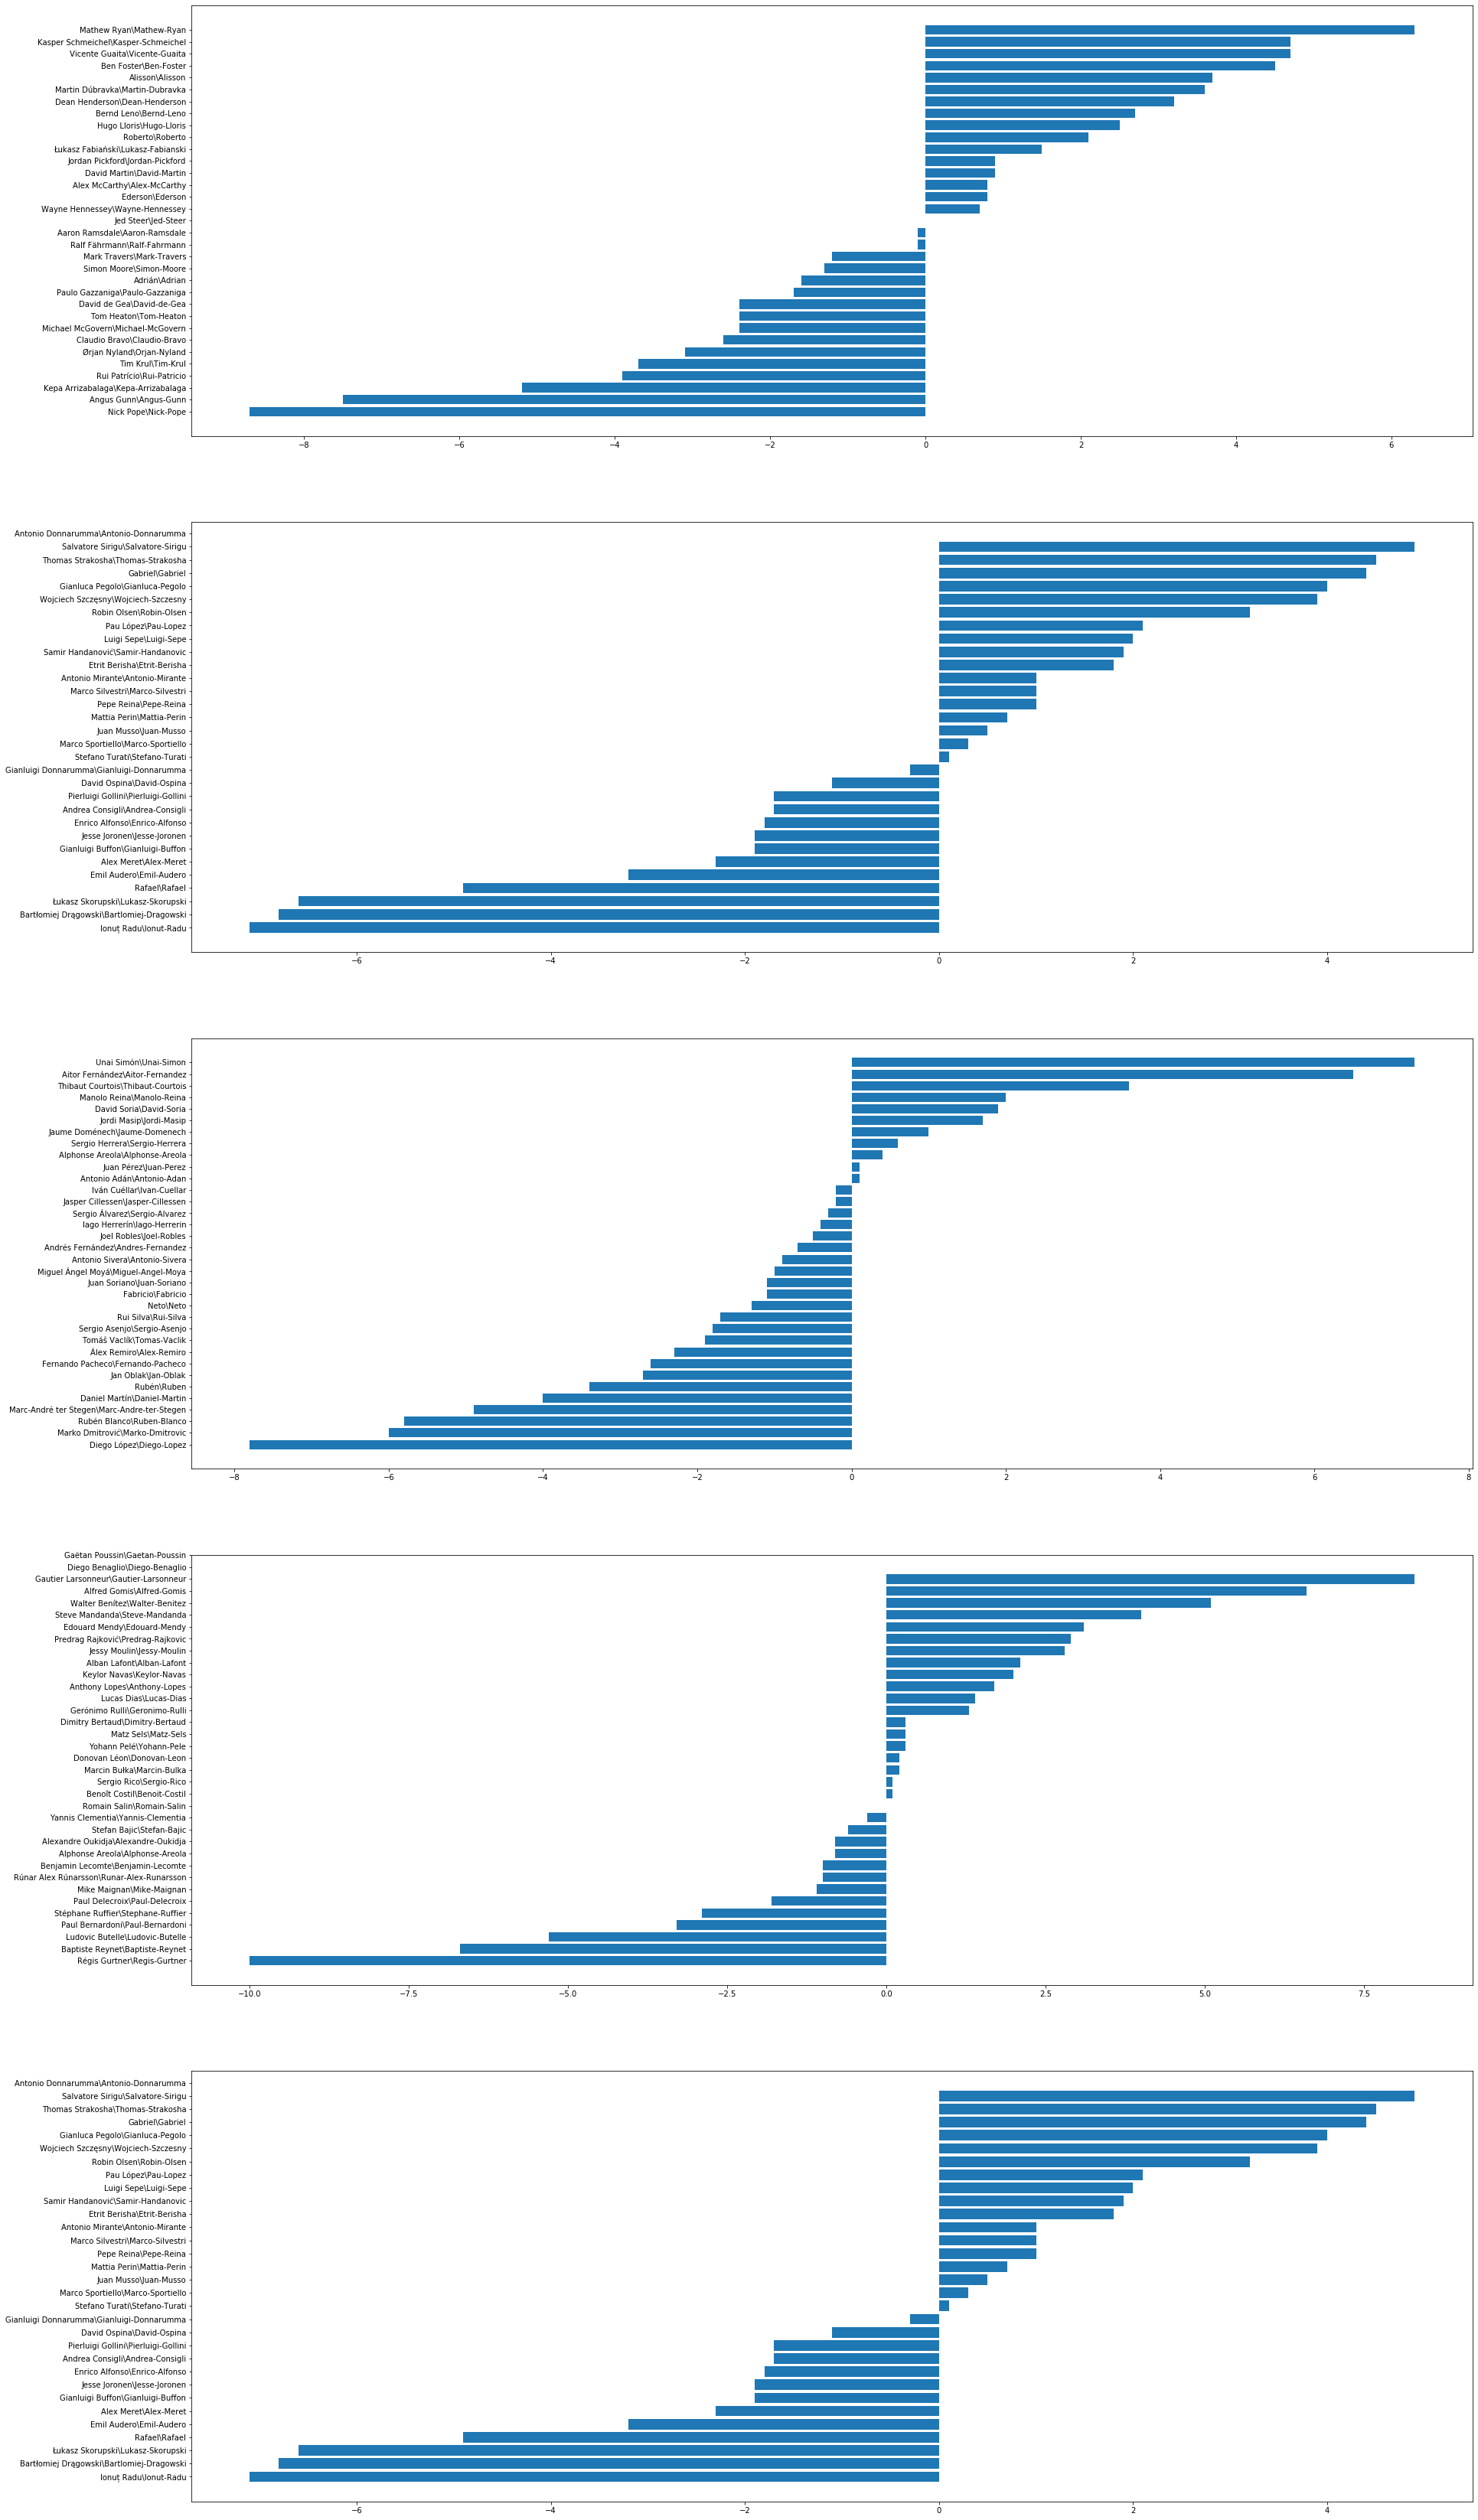

In [12]:
plt.figure(figsize=(30,60))
for i, GSAE in enumerate(top5_GSAE):
    plt.subplot(5, 1, i+1)
    plt.barh(top5_names[i], GSAE)


C:\Users\Christian\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


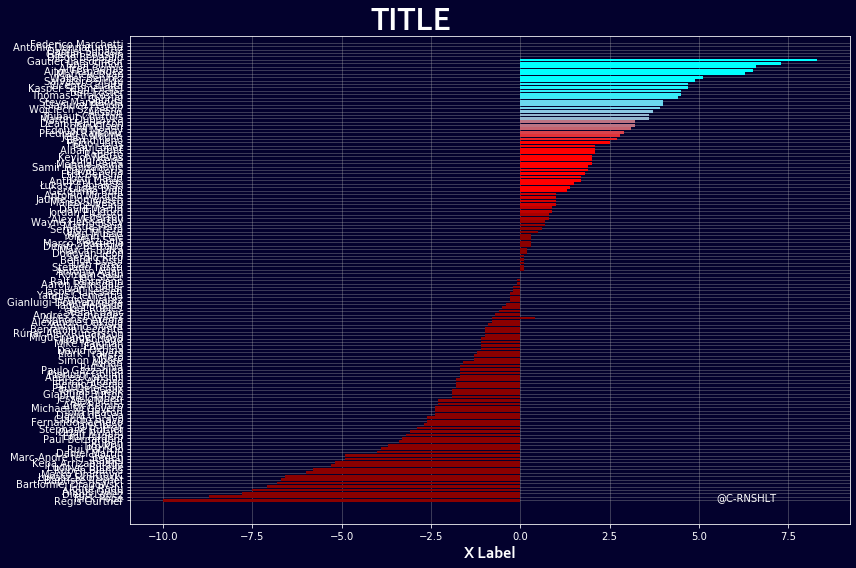

In [11]:
#sort 1st plot
x = df_top5_adv_stats.sort_values("oTxG+/-")["Player"]
y = df_top5_adv_stats.sort_values("oTxG+/-")["oTxG+/-"]

#create colormap
clist = [(0, "darkred"), (0.125, "darkred"), (0.25, "red"), 
         (0.5, "red"), (0.75, "skyblue"), (1, "cyan")]
rvb = mcolors.LinearSegmentedColormap.from_list("", clist)
N = 5 #highest value on x-axis (ax1) 

#create plot
fig, ax = plt.subplots(figsize=(12,8))

#get limits for future adding of text
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

#set background color
fig.set_facecolor("#03012d")
ax.set_facecolor("#03012d")

#plot 1st subplot
ax.barh(x, y, 
         color=rvb(y/N), zorder=3)
ax.set_xlabel("X Label",
        fontsize=16, fontname="Corbel", color="white", fontweight="bold")

#add title
ax.set_title("TITLE", 
             x=0.39, y=1, fontsize=32, fontname="Corbel", color="white", fontweight="bold")

#add text end of bars
#for i, value in enumerate(y):
#    ax.text(value, i, " "+str(round(value, 2)), color="white", va="center")

#remove spines, xticks and add grid
ax.tick_params(axis="both", colors="white")
#ax.set_xticks([])
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")
ax.spines["right"].set_color("white")
ax.spines["top"].set_color("white")
ax.grid(zorder=0, alpha=0.4)

#add signature
ax.text(xmax+4.5, ymin, "@C-RNSHLT", color="white")

plt.tight_layout()

#plt.savefig("output/NAME_OF_FILE_BARH.png", dpi=300,facecolor="#03012d");